In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
bank = pd.read_csv('mapped_imputed_simulated_transaction_2024.csv')

#print bank dimensions
print(bank.shape)

# remove columns = ['Unamed:0']
bank = bank.drop(['Unnamed: 0'], axis=1)

bank.head()

(230126, 10)


,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store


### Salary Estimation from company inflows

In [10]:
# filter for positive transactions in 'Amount'
bank_salary = bank[bank['Amount'] > 0]

# filter for to exlude NaN in 'Third Party Name'
bank_salary = bank_salary[bank_salary['Third Party Name'].notnull()]

bank_salary.head()

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,678330503.0,2971.00,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
4,624500124.0,3226.00,1825.00,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store
5,203466392.0,4607.66,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00,2023-01-01,00:00:00,School
6,768271776.0,3620.00,1950.00,NaN,A Cut Above,2023-01-01 00:00:00,2023-01-01,00:00:00,Barber


- Many bank payments are direct debits - potentially for mortgage payments, loan repayments etc.

In [13]:
# get range of times in Timestamp column
print(bank_salary['Timestamp'].min())
print(bank_salary['Timestamp'].max())

00:00:00
23:59:00


- Definitely direct debit salary payments!

In [19]:
# for each account number get count of transactions
count_payments=bank_salary['Account No'].value_counts()


# filter for transcations from accounts with 10 transactions in count_payments
#print(count_payments[count_payments == 10])

accounts_10 = count_payments[count_payments == 10].index
#print(accounts_10)

# filter bank_salary for 'Account No' in accounts_10
#bank_salary_10 = bank_salary[bank_salary['Account No'].isin(accounts_10)]


# get first account no in accounts_10 and filter bank_salary for it
account_10 = accounts_10[0]
bank_salary_account_10_ind_0 = bank_salary[bank_salary['Account No'] == account_10]
bank_salary_account_10_ind_0


,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
20377,871866387.0,1846.6291,1712.0,NaN,Happy Days Home,2023-01-31 00:00:00,2023-01-31,00:00:00,Furniture Shop
38672,871866387.0,1339.4392,1712.0,NaN,Happy Days Home,2023-02-28 00:00:00,2023-02-28,00:00:00,Furniture Shop
74411,871866387.0,1797.5577,1712.0,NaN,Happy Days Home,2023-04-30 00:00:00,2023-04-30,00:00:00,Furniture Shop
93315,871866387.0,1146.3347,1712.0,NaN,Happy Days Home,2023-05-31 00:00:00,2023-05-31,00:00:00,Furniture Shop
112659,871866387.0,1707.8069,1712.0,NaN,Happy Days Home,2023-06-30 00:00:00,2023-06-30,00:00:00,Furniture Shop
133384,871866387.0,1565.9649,1712.0,NaN,Happy Days Home,2023-07-31 00:00:00,2023-07-31,00:00:00,Furniture Shop
154207,871866387.0,1251.6665,1712.0,NaN,Happy Days Home,2023-08-31 00:00:00,2023-08-31,00:00:00,Furniture Shop
175977,871866387.0,662.5436,1712.0,NaN,Happy Days Home,2023-09-30 00:00:00,2023-09-30,00:00:00,Furniture Shop
198496,871866387.0,1243.0183,1712.0,NaN,Happy Days Home,2023-10-31 00:00:00,2023-10-31,00:00:00,Furniture Shop
220709,871866387.0,1739.2947,1712.0,NaN,Happy Days Home,2023-11-30 00:00:00,2023-11-30,00:00:00,Furniture Shop


- Due to the missing dates in December as well as March - extrapolated salaries can be computed.

In [20]:
# accounts with 11 transactions
accounts_11 = count_payments[count_payments == 11].index

# get first account no in accounts_11 and filter bank_salary for it
account_11 = accounts_11[0]
bank_salary_account_11_ind_0 = bank_salary[bank_salary['Account No'] == account_11]
bank_salary_account_11_ind_0

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
20536,492058070.0,1677.120000,1694.0,NaN,Happy Days Home,2023-01-31 00:00:00,2023-01-31,00:00:00,Furniture Shop
38382,492058070.0,1718.276400,1694.0,NaN,Happy Days Home,2023-02-28 00:00:00,2023-02-28,00:00:00,Furniture Shop
56485,492058070.0,1439.945969,1694.0,NaN,Happy Days Home,2023-03-31 00:00:00,2023-03-31,00:00:00,Furniture Shop
74228,492058070.0,931.915969,1694.0,NaN,Happy Days Home,2023-04-30 00:00:00,2023-04-30,00:00:00,Furniture Shop
93081,492058070.0,-175.444031,1694.0,NaN,Happy Days Home,2023-05-31 00:00:00,2023-05-31,00:00:00,Furniture Shop
112752,492058070.0,2213.785969,1694.0,NaN,Happy Days Home,2023-06-30 00:00:00,2023-06-30,00:00:00,Furniture Shop
133005,492058070.0,2343.315969,1694.0,NaN,Happy Days Home,2023-07-31 00:00:00,2023-07-31,00:00:00,Furniture Shop
154415,492058070.0,3950.883469,1694.0,NaN,Happy Days Home,2023-08-31 00:00:00,2023-08-31,00:00:00,Furniture Shop
176049,492058070.0,2234.995969,1694.0,NaN,Happy Days Home,2023-09-30 00:00:00,2023-09-30,00:00:00,Furniture Shop
198243,492058070.0,2029.135969,1694.0,NaN,Happy Days Home,2023-10-31 00:00:00,2023-10-31,00:00:00,Furniture Shop


In [21]:
######## 12 transactions - sum annual income

bank_salary_accounts_12 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 12].index)]
annual_income_12=bank_salary_accounts_12.groupby('Account No')['Amount'].sum()
annual_income_12

Account No
104832000.0    20100.0
111137699.0    20100.0
116598243.0    20472.0
119993184.0    20544.0
124102251.0    22999.2
                ...   
977899503.0    19308.0
986774156.0    20100.0
987229118.0    21900.0
994214354.0    35988.0
998390769.0    19500.0
Name: Amount, Length: 289, dtype: float64

In [27]:
######### 11 transactions - take mode 'Amount' and add to annual income

bank_salary_accounts_11 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 11].index)]
annual_income_11=bank_salary_accounts_11.groupby('Account No')['Amount'].sum()

# get mode of 'Amount' for each account
mode_amount_11 = bank_salary_accounts_11.groupby('Account No')['Amount'].agg(lambda x: x.value_counts().index[0])
#mode_amount_11

# add this mode amount to annual_income_11 
annual_income_11_12 = annual_income_11 + mode_amount_11
annual_income_11_12

Account No
101531259.0    18510.0
106601471.0    20100.0
108481285.0    19008.0
108563213.0    44988.0
108931112.0    57348.0
                ...   
992204045.0    54996.0
994947671.0    21456.0
995615876.0    20796.0
996042490.0    45000.0
999752672.0    32496.0
Name: Amount, Length: 321, dtype: float64

In [36]:
######### 10 transactions - take mode 'Amount', multiply by 2, and add to sum of annual income

bank_salary_accounts_10 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 10].index)]
annual_income_10=bank_salary_accounts_10.groupby('Account No')['Amount'].sum()

# get mode of 'Amount' for each account
mode_amount_10 = bank_salary_accounts_10.groupby('Account No')['Amount'].agg(lambda x: x.value_counts().index[0])
#mode_amount_11

# add this mode amount to annual_income_11 
annual_income_10_12 = annual_income_10 + 2*mode_amount_10
annual_income_10_12

Account No
352899149.0    19008.0
556992209.0    39996.0
653667523.0    20100.0
727417797.0    18510.0
871866387.0    20544.0
954263768.0    18540.0
Name: Amount, dtype: float64

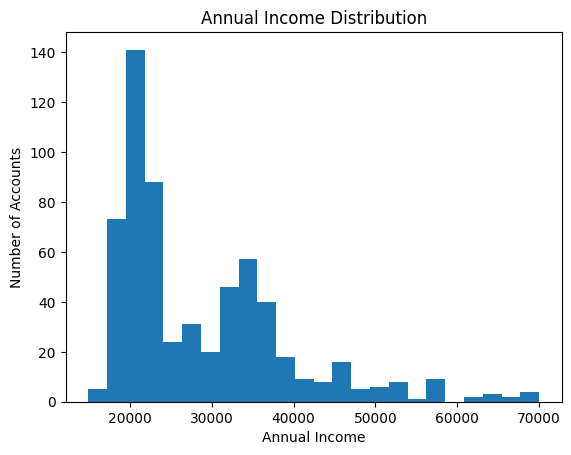

In [42]:
# vertically concatenate annual_income_10_12, annual_income_11_12, annual_income_12
annual_income = pd.concat([annual_income_10_12, annual_income_11_12, annual_income_12])
annual_income.shape

# histogram of annual_income

# get correct bin size
from scipy.stats import iqr

bin_size = int(np.sqrt(annual_income.shape[0]))

plt.hist(annual_income, bins=bin_size)
plt.xlabel('Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Annual Income Distribution') 
plt.show()

### Expenditure-to-Income model

In [44]:
# filter bank for negative transactions in 'Amount'
bank_expenses = bank[bank['Amount'] < 0]

# filter for to exlude NaN in 'Third Party Account No'
# Could include money going to other people - but only looking at money being spent in businesses
bank_expenses = bank_expenses[bank_expenses['Third Party Account No'].isnull()]

bank_expenses.head()    

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
495,355733816.0,526.00,-664.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
496,472213568.0,2412.00,-600.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
497,624500124.0,2572.00,-654.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
498,203466392.0,3935.66,-672.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
499,768271776.0,2208.00,-632.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking


In [49]:
# Pivot table to sum of transactions for each 'Third Party Name' for each 'Account No'
expenses_pivot = bank_expenses.pivot_table(index='Account No', columns='group', values='Amount', aggfunc='sum')

# fill NaN with 0
expenses_pivot = expenses_pivot.fillna(0)

# take absolute value of 'Amount' in each column
expenses_pivot = expenses_pivot.abs()

expenses_pivot.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,513.66,10308.0,0.0,0.00,0.0,2200.50,0.0,0.00,95.88,87.27,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,308.99,2394.86,0.00
104832000.0,0.00,10332.0,200.0,0.00,0.0,0.00,0.0,0.00,191.88,211.33,...,0.0,0.0,7.31,0.0,0.0,0.0,0.0,0.00,3619.33,0.00
105375973.0,0.00,0.0,0.0,462.18,0.0,639.15,0.0,2414.01,287.76,134.64,...,0.0,0.0,69.03,12.9,0.0,0.0,0.0,2577.30,258.79,2023.97
106601471.0,148.81,0.0,0.0,199.82,0.0,3042.28,0.0,33.72,191.88,398.88,...,0.0,0.0,159.38,23.9,0.0,0.0,0.0,257.02,1039.83,123.03
108481285.0,1190.93,0.0,0.0,124.88,0.0,2219.30,0.0,236.04,183.77,64.28,...,0.0,0.0,660.89,0.0,0.0,0.0,0.0,1901.14,1528.08,362.81


In [58]:
# Filter expenses_pivot for accounts with computed salaries in annual_income
expenses_pivot = expenses_pivot[expenses_pivot.index.isin(annual_income.index)]
expenses_pivot.shape

(616, 31)

In [59]:
# count how many sparse columns there are with more than 50% of values as 0
sparse_columns = expenses_pivot.columns[(expenses_pivot == 0).mean() > 0.5]
len(sparse_columns)

15

- 15 columns (half of all merchants) have extremely sparse feature vectors.

In [62]:
#### calculate ratio of expenses to annual income for each account and each group

# Sort Account No in annual_income and expenses_pivot
annual_income = annual_income.sort_index()
expenses_pivot = expenses_pivot.sort_index()

# divide expenses_pivot by annual_income
expenses_ratio = expenses_pivot.div(annual_income, axis=0)

expenses_ratio.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,0.027750,0.556888,0.00000,0.000000,0.0,0.118882,0.0,0.000000,0.005180,0.004715,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.016693,0.129382,0.000000
104832000.0,0.000000,0.514030,0.00995,0.000000,0.0,0.000000,0.0,0.000000,0.009546,0.010514,...,0.0,0.0,0.000364,0.000000,0.0,0.0,0.0,0.000000,0.180066,0.000000
106601471.0,0.007403,0.000000,0.00000,0.009941,0.0,0.151357,0.0,0.001678,0.009546,0.019845,...,0.0,0.0,0.007929,0.001189,0.0,0.0,0.0,0.012787,0.051733,0.006121
108481285.0,0.062654,0.000000,0.00000,0.006570,0.0,0.116756,0.0,0.012418,0.009668,0.003382,...,0.0,0.0,0.034769,0.000000,0.0,0.0,0.0,0.100018,0.080391,0.019087
108563213.0,0.004845,0.000000,0.00000,0.000445,0.0,0.117279,0.0,0.007941,0.006396,0.001851,...,0.0,0.0,0.008419,0.000000,0.0,0.0,0.0,0.043217,0.105010,0.013871


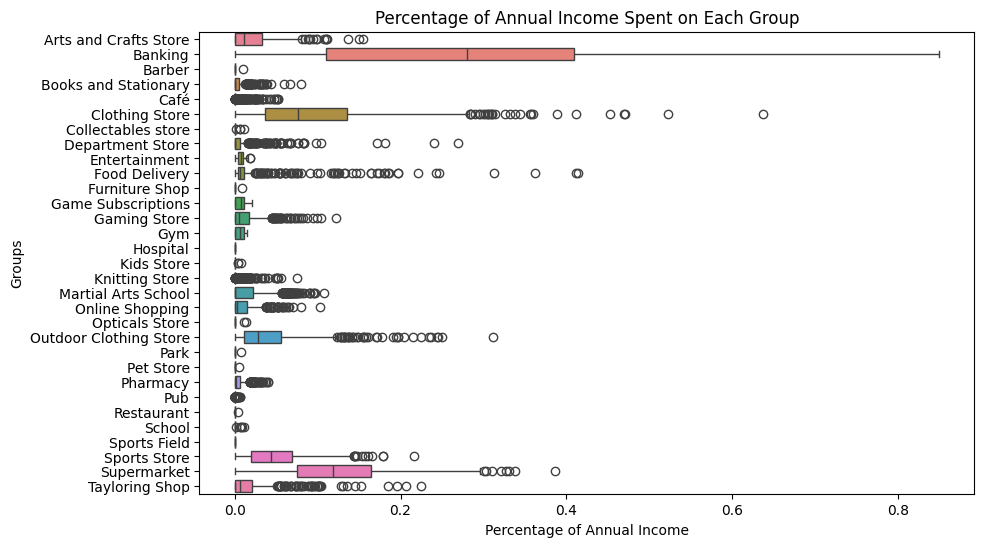

In [63]:
# plot percentage spent on each group 
plt.figure(figsize=(10, 6))
sns.boxplot(data=expenses_ratio, orient='h')
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Groups')
plt.title('Percentage of Annual Income Spent on Each Group')
plt.show()

<Figure size 2000x1200 with 0 Axes>

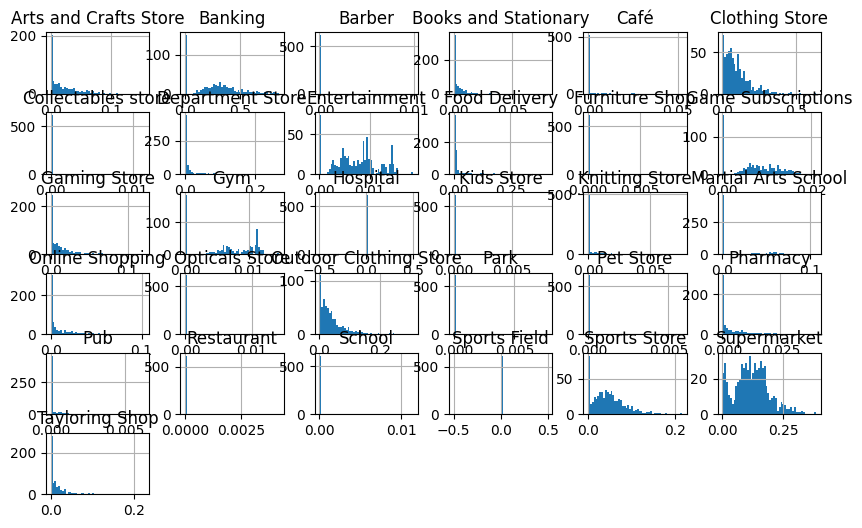

In [65]:
# plot of values in each feature in expenses_ratio as a histogram
plt.figure(figsize=(20, 12))
expenses_ratio.hist(bins=50, figsize=(10, 6))
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Percentage of Annual Income Spent on Each Group')
plt.show()
